<a href="https://colab.research.google.com/github/Medynal/Pollution/blob/main/pollution_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import os

repo_url = "https://github.com/Medynal/Pollution.git"
folder_path = "/content/Pollution"

if not os.path.exists(folder_path):
  !git clone {repo_url} {folder_path}
print(f"Current working directory: {os.getcwd()}")


Cloning into '/content/Pollution'...
remote: Enumerating objects: 324, done.
remote: Counting objects: 100% (106/106), done.
remote: Compressing objects: 100% (71/71), done.
remote: Total 324 (delta 82), reused 34 (delta 34), pack-reused 218 (from 2)
Receiving objects: 100% (324/324), 31.46 MiB | 7.59 MiB/s, done.
Resolving deltas: 100% (147/147), done.
Current working directory: /content


In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.metrics import mean_absolute_error, r2_score, accuracy_score, classification_report, confusion_matrix, mean_squared_error
import joblib

In [7]:
cpollution_df = pd.read_csv('/content/Pollution/cleaned_pollution_dataset (1).csv', parse_dates=['Date']).drop(['Month name', 'Date'], axis= 1)
cpollution_df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day
0,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2015,1,1
1,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2016,1,1
2,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.00,0.00,278.0,Poor,2017,1,1
3,Ahmedabad,84.46,131.62,7.58,87.62,48.40,32.95,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor,2018,1,1
4,Ahmedabad,110.71,131.62,63.03,111.56,100.04,32.95,63.03,80.15,57.12,4.08,32.33,6.93,1474.0,Severe,2019,1,1


In [8]:
#encoding AQI bucket
bucket_encoder = LabelEncoder()
cpollution_df['AQI_Bucket_encoded'] = bucket_encoder.fit_transform(cpollution_df['AQI_Bucket'])

In [9]:
cpollution_df.head()

,City,PM2.5,PM10,NO,NO2,NOx,NH3,CO,SO2,O3,Benzene,Toluene,Xylene,AQI,AQI_Bucket,year,month,day,AQI_Bucket_encoded
0,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2015,1,1,2
1,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.02,0.00,278.0,Poor,2016,1,1,2
2,Ahmedabad,84.46,131.62,0.92,18.22,17.15,32.95,0.92,27.64,133.36,0.00,0.00,0.00,278.0,Poor,2017,1,1,2
3,Ahmedabad,84.46,131.62,7.58,87.62,48.40,32.95,7.58,102.36,69.02,14.48,45.60,6.33,278.0,Poor,2018,1,1,2
4,Ahmedabad,110.71,131.62,63.03,111.56,100.04,32.95,63.03,80.15,57.12,4.08,32.33,6.93,1474.0,Severe,2019,1,1,4


In [11]:
pollutants = ['PM2.5','PM10','NO','NO2','NOx','NH3','CO','SO2','O3','Benzene','Toluene','Xylene']
labels = ['City','year','month', 'day', 'AQI'] + pollutants

#AQI bucket model feature and target
X = cpollution_df[labels]
target_AQIB= cpollution_df['AQI_Bucket_encoded']

#AQI model feature and target
X_= cpollution_df[labels].drop('AQI', axis=1)
target_AQI= cpollution_df['AQI']

In [12]:
# Train-test split for AQI bucket
X_train, X_test, y_train, y_test = train_test_split( X, target_AQIB, test_size=0.2, random_state=42)

# Train-test split for AQI
Xb_train, Xb_test, yb_train, yb_test = train_test_split( X_, target_AQI, test_size=0.2, random_state=42)

In [15]:
#preprocessor for AQI_Bucket Model
preprocessor = ColumnTransformer(transformers=[('city', OneHotEncoder(handle_unknown='ignore'), ['City']),
        ('others', 'passthrough', ['year','month', 'day','AQI'] + pollutants)])

#classification pipeline to predict AQI_Bucket
AQIB_pipeline = Pipeline([('preprocessor', preprocessor),
    ('rf', RandomForestClassifier(n_estimators=200, random_state=42))])

AQIB_pipeline.fit(X_train, y_train)
y_pred = AQIB_pipeline.predict(X_test)
print('Classification accuracy:', accuracy_score(y_test, y_pred))
print('Classification report:\n', classification_report(y_test, y_pred))

Classification accuracy: 0.9967834772304046
Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       275
           1       1.00      1.00      1.00      2104
           2       0.99      1.00      0.99       663
           3       1.00      1.00      1.00      2035
           4       1.00      0.96      0.98       317
           5       0.98      0.99      0.98       513

    accuracy                           1.00      5907
   macro avg       0.99      0.99      0.99      5907
weighted avg       1.00      1.00      1.00      5907



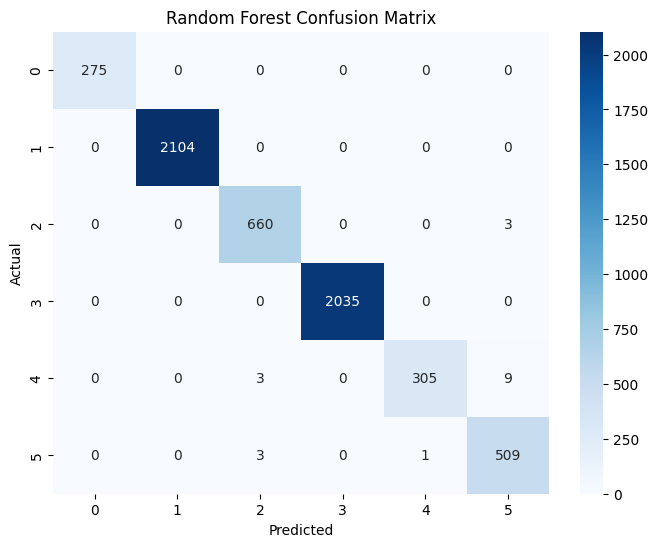

In [16]:
#Visualise confusion matrix for AQIB model
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, cmap='Blues', fmt='d')
plt.title("Random Forest Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [17]:
#Preprocessor for AQI prediction
preprocessor1 = ColumnTransformer([
    ('city', OneHotEncoder(handle_unknown='ignore'), ['City']),
    ('others', 'passthrough', ['year','month','day'] + pollutants)])

AQI_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor1),
    ("regressor", RandomForestRegressor(
        n_estimators=200,
        max_depth=5,
        min_samples_split=2,
        random_state=42,
        n_jobs=-1 ))])

AQI_pipeline.fit(Xb_train, yb_train)

yb_pred = AQI_pipeline.predict(Xb_test)

mae  = mean_absolute_error(yb_test, yb_pred)
mse  = mean_squared_error(yb_test, yb_pred)
rmse = np.sqrt(mse)
r2   = r2_score(yb_test, yb_pred)

print("MAE :", mae)
print("MSE :", mse)
print("RMSE:", rmse)
print("R²  :", r2)





MAE : 29.83180412057481
MSE : 2841.543932056495
RMSE: 53.306134094084285
R²  : 0.8508020030972676


In [18]:
os.makedirs('models', exist_ok=True)
joblib.dump(AQIB_pipeline, 'models/aqib_classifier.pkl')
joblib.dump(AQI_pipeline, 'models/aqi_regressor.pkl')
joblib.dump(bucket_encoder, 'models/bucket_encoder.pkl')
print('Models saved in models/ folder')

Models saved in models/ folder
